In [94]:
#imorting the necessory libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [68]:
#mounting the drive for taking the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#storing the dataset in train_data and test_data
train_data=pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/ml|RepoProjects/Uniqlo/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
test_data=pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/ml|RepoProjects/Uniqlo/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv')

In [70]:
#chaking the top 5 columns
train_data.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [71]:
#shape of the dataset (row ,columns)
train_data.shape

(1226, 7)

In [72]:
#top five columns of test data
test_data.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000


In [73]:
#shape of the data
test_data.shape

(7, 7)

In [74]:
#cheking the null valuse  in train dataset
train_data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [75]:
#cheking the null values in the train dataset
test_data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [90]:
# Preprocessing function
def preprocess_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Combine train and test data for visualization
all_data = pd.concat([train_data, test_data])

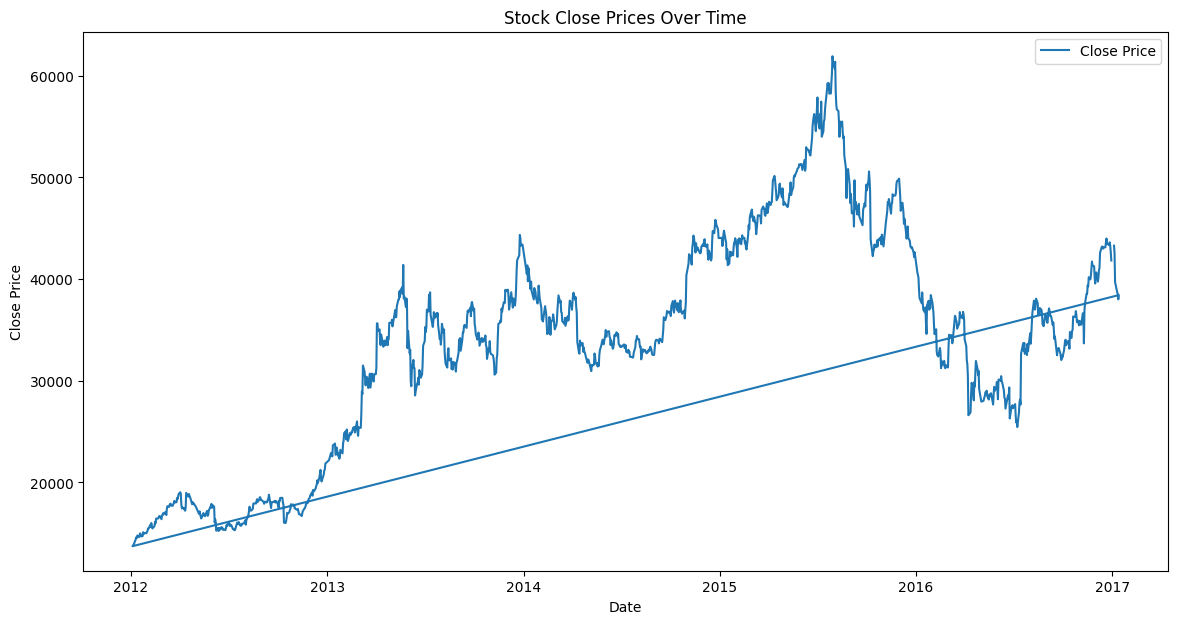

In [91]:
# Line chart of stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(all_data.index, all_data['Close'], label='Close Price')
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

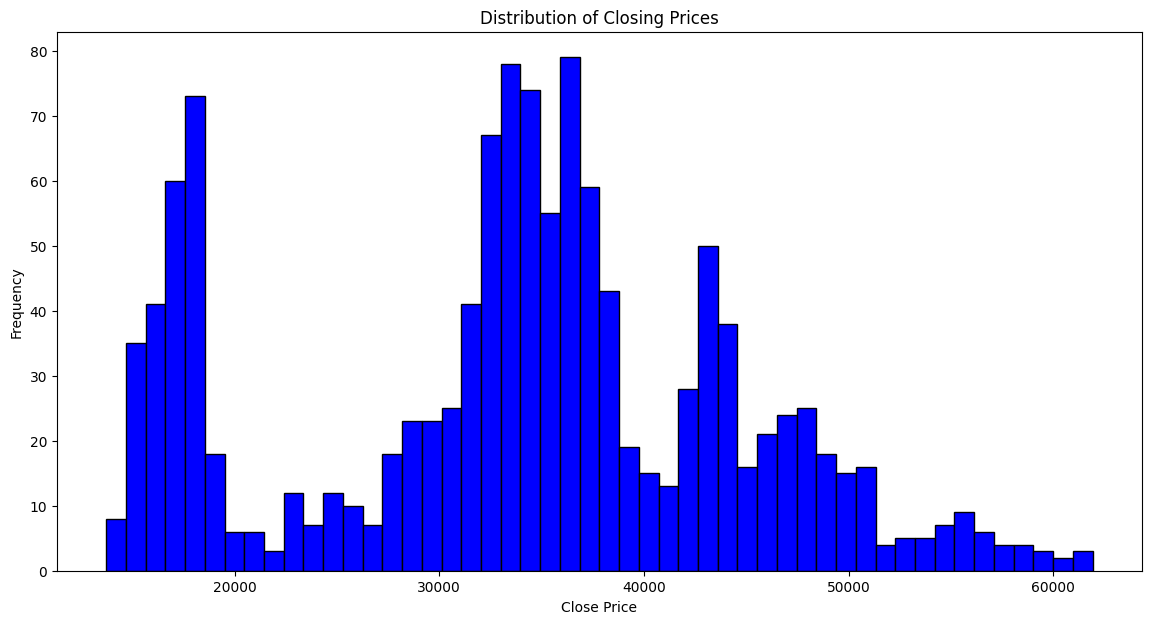

In [92]:
# Histogram of closing prices
plt.figure(figsize=(14, 7))
plt.hist(all_data['Close'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

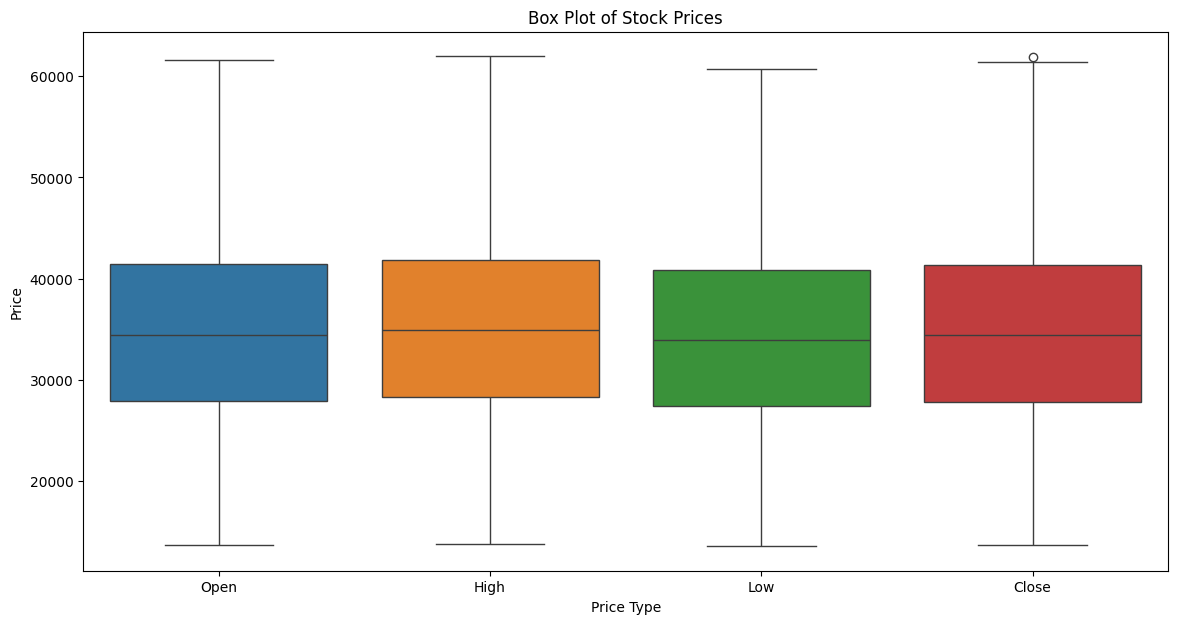

In [95]:
# Box plot of stock prices
plt.figure(figsize=(14, 7))
sns.boxplot(data=all_data[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Stock Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

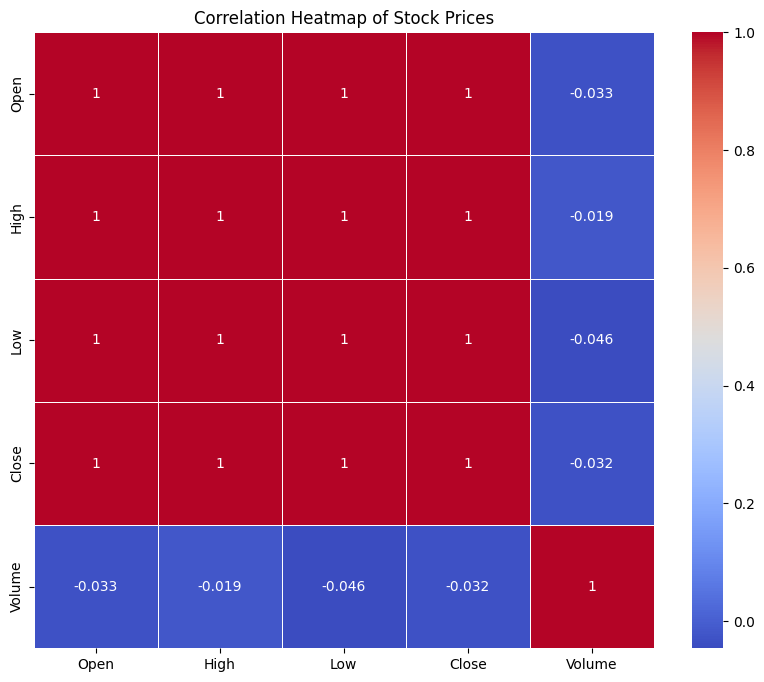

In [96]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = all_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

In [76]:
#Doing the scaling on the dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaler.fit_transform(train_data[["Open","High","Low","Close","Volume"]])

In [77]:
# Create features and labels
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])
        y.append(data[i + time_step, 3])  # 3 is the index for 'Close' price
    return np.array(X), np.array(y)

In [78]:
time_step = 10
X_train, y_train = create_dataset(scaled_train_data, time_step)

In [79]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])


In [80]:
#Building a LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


In [81]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
31/31 [==============================] - 7s 63ms/step - loss: 0.0310 - val_loss: 0.0100
Epoch 2/50
31/31 [==============================] - 1s 39ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 3/50
31/31 [==============================] - 1s 37ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/50
31/31 [==============================] - 1s 38ms/step - loss: 0.0034 - val_loss: 9.7432e-04
Epoch 5/50
31/31 [==============================] - 1s 29ms/step - loss: 0.0034 - val_loss: 9.0812e-04
Epoch 6/50
31/31 [==============================] - 1s 31ms/step - loss: 0.0028 - val_loss: 9.7532e-04
Epoch 7/50
31/31 [==============================] - 1s 30ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 8/50
31/31 [==============================] - 1s 33ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 9/50
31/31 [==============================] - 1s 23ms/step - loss: 0.0024 - val_loss: 9.5152e-04
Epoch 10/50
31/31 [==============================] - 1s 20ms/step - loss: 0.0023 - val_loss: 

In [83]:

# Save the model
model.save('uniqlo_stock_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
